# Análisis exploratorio (EDA)

Este Notebook se encarga del análisis, la exploración y la limpieza de los datos, y las posteriores visualizaciones que he considerado óptimas para el estudio del Dataset 'Automobile' con el fin de intentar determinar relaciones entre las características de los coches.

El fichero 'imports-85.data' dentro de la carpeta 'automobile' contiene los datos sobre los que trabajaremos.

### Importación de bibliotecas necesarias

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga adecuada del Dataset

In [47]:
# Creamos una lista para poner nombre a los atributos (columnas) tal y como vienen en el fichero 'imports-85.names'
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
    "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
    "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]

# Cargamos el Dataset desde el archivo local
df = pd.read_csv("automobile/imports-85.data", names=column_names, decimal='.')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Análisis exploratorio y limpieza de datos

Vamos a explorar cada atributo de forma individualizada para asegurar la calidad de los datos, incluyendo:
    
· Verificación de valores únicos
    
· Conteo de valores
    
· Verificación de valores nulos
    
· Verificación de valores anómalos
    
· Tratamiento de datos

· Visualización

Análisis preliminar de la columna 'symboling'

Valores únicos en symboling: [ 3  1  2  0 -1 -2]

Conteo de valores en symboling:
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

Valores nulos en symboling: 0

Visualización:


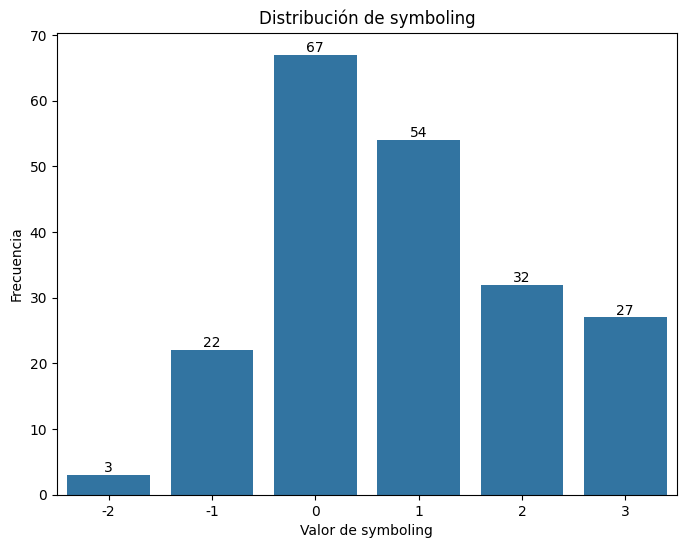

In [48]:
print("Análisis preliminar de la columna 'symboling'\n")

# Verificamos valores únicos
unique_values_symboling = df['symboling'].unique()
print(f"Valores únicos en symboling: {unique_values_symboling}\n")

# Contamos valores
value_counts_symboling = df['symboling'].value_counts()
print(f"Conteo de valores en symboling:")
print(value_counts_symboling)

# Verificamos valores nulos
null_values_symboling = df['symboling'].isnull().sum()
print(f"\nValores nulos en symboling: {null_values_symboling}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='symboling', data=df)
plt.title('Distribución de los valores de la columna symboling')
plt.title('Distribución de symboling')
plt.xlabel('Valor de symboling')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'normalized-losses'

Valores únicos en normalized-losses: [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]

Valores nulos en normalized-losses: 41

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

Valores nulos después de la imputación: 0

Visualización:


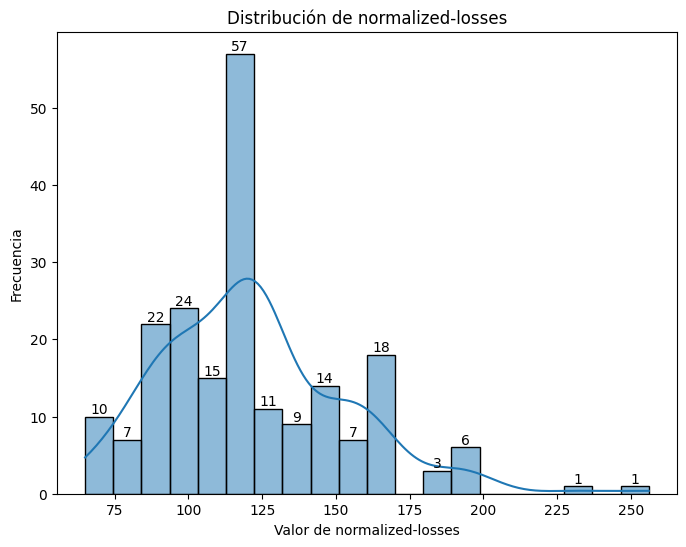

In [49]:
print("Análisis preliminar de la columna 'normalized-losses'\n")

# Reemplazamos valores '?' por NaN y convertimos a tipo numérico
df['normalized-losses'] = df['normalized-losses'].replace('?', pd.NA)
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])

# Verificamos valores únicos
unique_values_normalized_losses = df['normalized-losses'].unique()
print(f"Valores únicos en normalized-losses: {unique_values_normalized_losses}\n")

# Verificamos valores nulos
null_values_normalized_losses = df['normalized-losses'].isnull().sum()
print(f"Valores nulos en normalized-losses: {null_values_normalized_losses}\n")

# Realizamos un análisis estadístico preliminar para verificar la coherencia de los datos
print(df['normalized-losses'].describe())

# Rellenamos valores NaN con la media de la distribución
mean_value = df['normalized-losses'].mean()
df['normalized-losses'] = df['normalized-losses'].fillna(mean_value)
print(f"\nValores nulos después de la imputación: {df['normalized-losses'].isnull().sum()}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['normalized-losses'], bins=20, kde=True)
plt.title('Distribución de normalized-losses')
plt.xlabel('Valor de normalized-losses')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:  # Solo etiquetamos las barras con altura positiva
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')
    
print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'make'

Valores únicos en 'make': ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Conteo de valores en 'make':
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugeot          11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

Valores nulos en 'make': 0

Visualización:


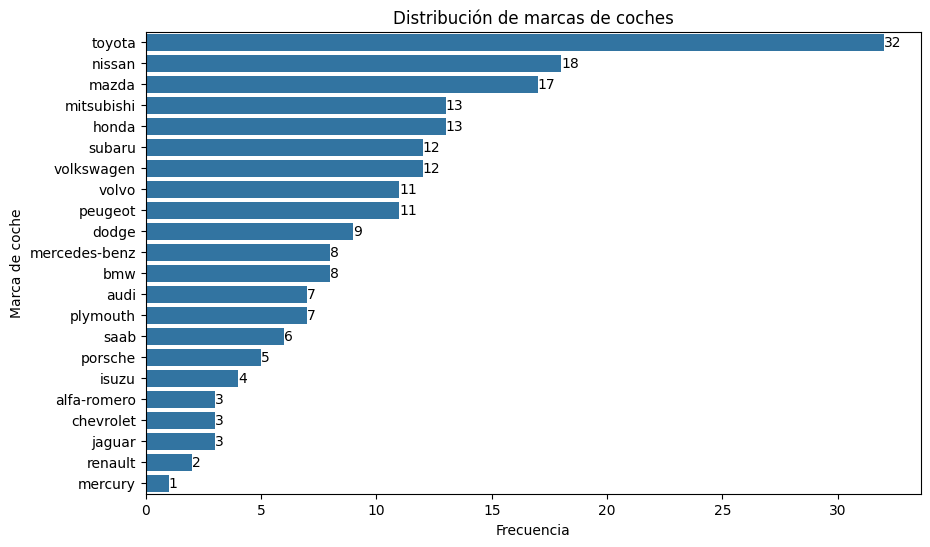

In [50]:
print("Análisis preliminar de la columna 'make'\n")

# Verificamos valores únicos
unique_values_make = df['make'].unique()
print(f"Valores únicos en 'make': {unique_values_make}\n")

# Corregimos la marca 'peugot' (mal escrita) por 'peugeot'
df['make'] = df['make'].replace('peugot', 'peugeot')

# Conteo de valores
value_counts_make = df['make'].value_counts()
print(f"Conteo de valores en 'make':")
print(value_counts_make)

# Verificamos valores nulos
null_values_make = df['make'].isnull().sum()
print(f"\nValores nulos en 'make': {null_values_make}\n")

# Visualizamos la distribución
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='make', data=df, order=df['make'].value_counts().index)
plt.title('Distribución de marcas de coches')
plt.xlabel('Frecuencia')
plt.ylabel('Marca de coche')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center')
    
print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'fuel-type'

Valores únicos en 'fuel-type': ['gas' 'diesel']

Conteo de valores en 'fuel-type':
fuel-type
gas       185
diesel     20
Name: count, dtype: int64

Valores nulos en 'fuel-type': 0

Visualización:


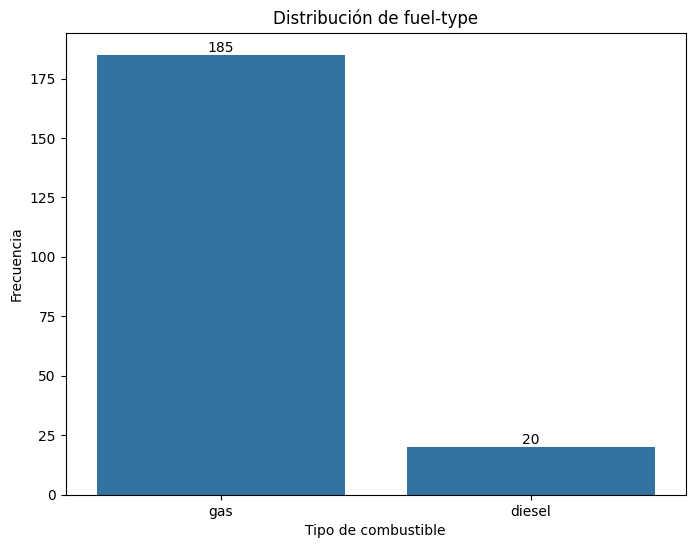

In [51]:
print("Análisis preliminar de la columna 'fuel-type'\n")

# Verificamos valores únicos
unique_values_fuel_type = df['fuel-type'].unique()
print(f"Valores únicos en 'fuel-type': {unique_values_fuel_type}\n")

# Conteo de valores
value_counts_fuel_type = df['fuel-type'].value_counts()
print(f"Conteo de valores en 'fuel-type':")
print(value_counts_fuel_type)

# Verificamos valores nulos
null_values_fuel_type = df['fuel-type'].isnull().sum()
print(f"\nValores nulos en 'fuel-type': {null_values_fuel_type}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fuel-type', data=df)
plt.title('Distribución de fuel-type')
plt.xlabel('Tipo de combustible')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'aspiration'

Valores únicos en 'aspiration': ['std' 'turbo']

Conteo de valores en 'aspiration':
aspiration
std      168
turbo     37
Name: count, dtype: int64

Valores nulos en 'aspiration': 0



Visualización:


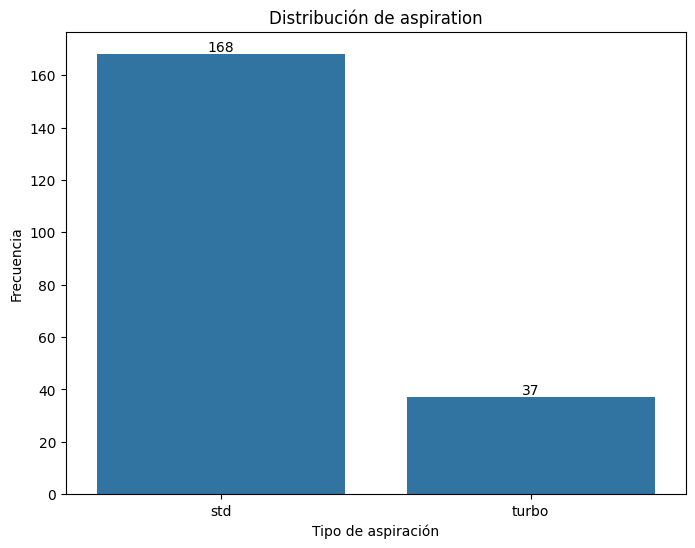

In [52]:
print("Análisis preliminar de la columna 'aspiration'\n")

# Verificamos valores únicos
unique_values_aspiration = df['aspiration'].unique()
print(f"Valores únicos en 'aspiration': {unique_values_aspiration}\n")

# Conteo de valores
value_counts_aspiration = df['aspiration'].value_counts()
print(f"Conteo de valores en 'aspiration':")
print(value_counts_aspiration)

# Verificamos valores nulos
null_values_aspiration = df['aspiration'].isnull().sum()
print(f"\nValores nulos en 'aspiration': {null_values_aspiration}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='aspiration', data=df)
plt.title('Distribución de aspiration')
plt.xlabel('Tipo de aspiración')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()


Análisis preliminar de la columna 'num-of-doors'

Valores únicos en 'num-of-doors': ['two' 'four' '?']

Conteo de valores en 'num-of-doors':
num-of-doors
four    114
two      89
?         2
Name: count, dtype: int64

Valores únicos en 'num-of-doors' después del reemplazo: ['two' 'four' <NA>]

Valores nulos en 'num-of-doors' después del reemplazo: 2

Valores nulos rellenados con la moda: four

Conteo de valores en 'num-of-doors' después de la imputación:
num-of-doors
four    116
two      89
Name: count, dtype: int64


C:\Users\rtx11679\AppData\Local\Temp\ipykernel_6956\1009340662.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(mode_value_num_doors, inplace=True)


Visualización:


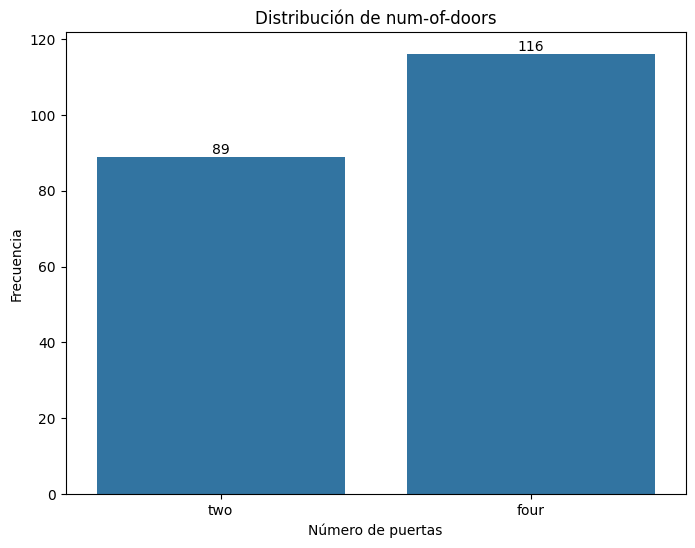

In [53]:
print("Análisis preliminar de la columna 'num-of-doors'\n")

# Verificamos valores únicos
unique_values_num_doors = df['num-of-doors'].unique()
print(f"Valores únicos en 'num-of-doors': {unique_values_num_doors}\n")

# Conteo de valores
value_counts_num_doors = df['num-of-doors'].value_counts()
print(f"Conteo de valores en 'num-of-doors':")
print(value_counts_num_doors)

# Reemplazamos valores '?' por NaN
df['num-of-doors'] = df['num-of-doors'].replace('?', pd.NA)

# Verificamos valores únicos después del reemplazo
unique_values_num_doors = df['num-of-doors'].unique()
print(f"\nValores únicos en 'num-of-doors' después del reemplazo: {unique_values_num_doors}\n")

# Verificamos valores nulos
null_values_num_doors = df['num-of-doors'].isnull().sum()
print(f"Valores nulos en 'num-of-doors' después del reemplazo: {null_values_num_doors}\n")

# Reemplazamos valores nulos con la moda
if null_values_num_doors > 0:
    mode_value_num_doors = df['num-of-doors'].mode()[0]
    df['num-of-doors'].fillna(mode_value_num_doors, inplace=True)
    print(f"Valores nulos rellenados con la moda: {mode_value_num_doors}\n")

# Conteo de valores después de la imputación
value_counts_num_doors = df['num-of-doors'].value_counts()
print(f"Conteo de valores en 'num-of-doors' después de la imputación:")
print(value_counts_num_doors)

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='num-of-doors', data=df)
plt.title('Distribución de num-of-doors')
plt.xlabel('Número de puertas')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'body-style'

Valores únicos en 'body-style': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Conteo de valores en 'body-style':
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
Valores nulos en 'body-style': 0

Visualización:


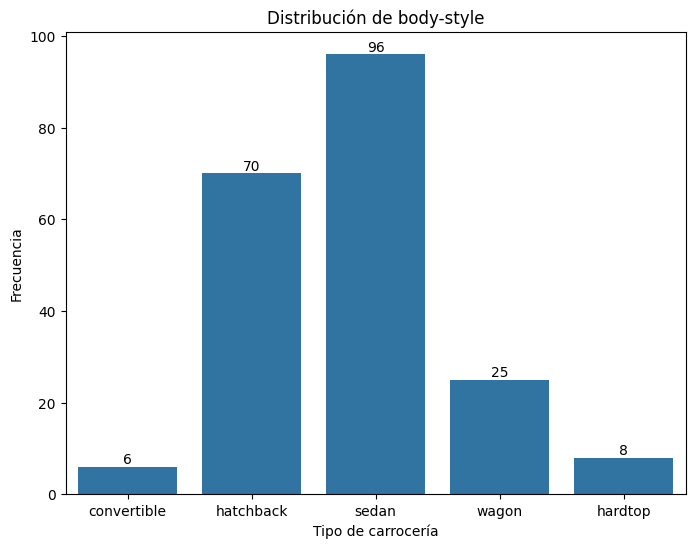

In [54]:
print("Análisis preliminar de la columna 'body-style'\n")

# Verificamos valores únicos
unique_values_body_style = df['body-style'].unique()
print(f"Valores únicos en 'body-style': {unique_values_body_style}\n")

# Conteo de valores
value_counts_body_style = df['body-style'].value_counts()
print(f"Conteo de valores en 'body-style':")
print(value_counts_body_style)

# Verificamos valores nulos
null_values_body_style = df['body-style'].isnull().sum()
print(f"Valores nulos en 'body-style': {null_values_body_style}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='body-style', data=df)
plt.title('Distribución de body-style')
plt.xlabel('Tipo de carrocería')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'drive-wheels'

Valores únicos en 'drive-wheels': ['rwd' 'fwd' '4wd']

Conteo de valores en 'drive-wheels':
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
Valores nulos en 'drive-wheels': 0

Visualización:


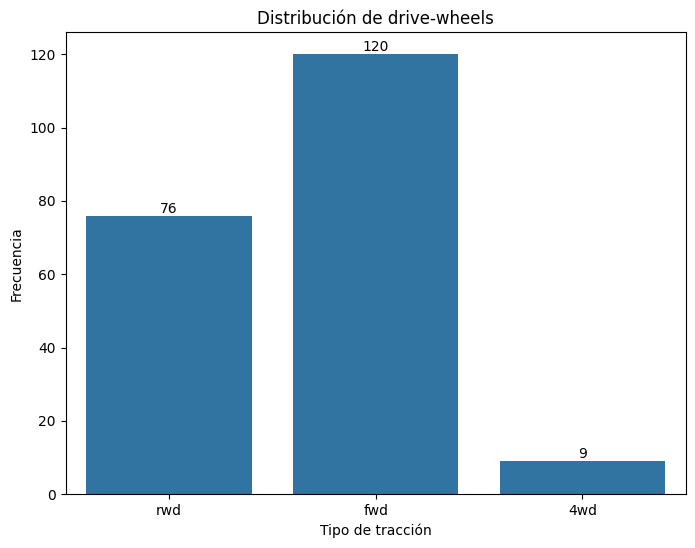

In [55]:
print("Análisis preliminar de la columna 'drive-wheels'\n")

# Verificamos valores únicos
unique_values_drive_wheels = df['drive-wheels'].unique()
print(f"Valores únicos en 'drive-wheels': {unique_values_drive_wheels}\n")

# Conteo de valores
value_counts_drive_wheels = df['drive-wheels'].value_counts()
print(f"Conteo de valores en 'drive-wheels':")
print(value_counts_drive_wheels)

# Verificamos valores nulos
null_values_drive_wheels = df['drive-wheels'].isnull().sum()
print(f"Valores nulos en 'drive-wheels': {null_values_drive_wheels}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='drive-wheels', data=df)
plt.title('Distribución de drive-wheels')
plt.xlabel('Tipo de tracción')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'engine-location'

Valores únicos en 'engine-location': ['front' 'rear']

Conteo de valores en 'engine-location':
engine-location
front    202
rear       3
Name: count, dtype: int64
Valores nulos en 'engine-location': 0

Visualización:


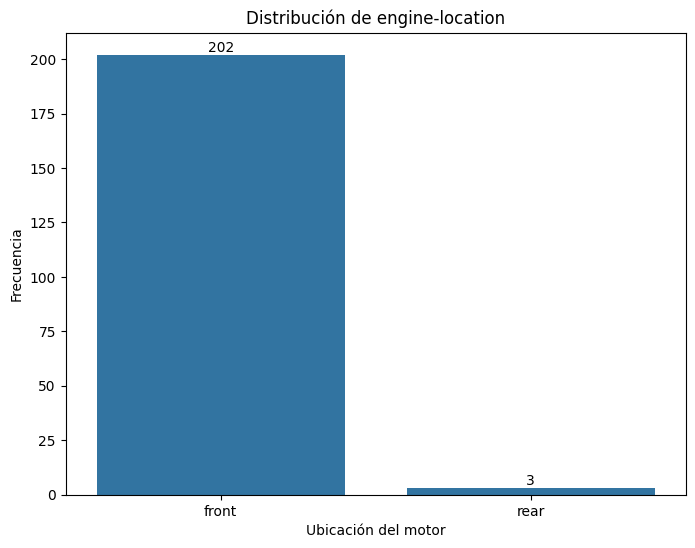

In [56]:
print("Análisis preliminar de la columna 'engine-location'\n")

# Verificamos valores únicos
unique_values_engine_location = df['engine-location'].unique()
print(f"Valores únicos en 'engine-location': {unique_values_engine_location}\n")

# Conteo de valores
value_counts_engine_location = df['engine-location'].value_counts()
print(f"Conteo de valores en 'engine-location':")
print(value_counts_engine_location)

# Verificamos valores nulos
null_values_engine_location = df['engine-location'].isnull().sum()
print(f"Valores nulos en 'engine-location': {null_values_engine_location}\n")

# Visualizamos la distribución
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='engine-location', data=df)
plt.title('Distribución de engine-location')
plt.xlabel('Ubicación del motor')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'wheel-base'

Valores únicos en 'wheel-base': [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]

Estadísticas descriptivas de la columna 'wheel-base':

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

Valores nulos en 'wheel-base': 0

Visualización:


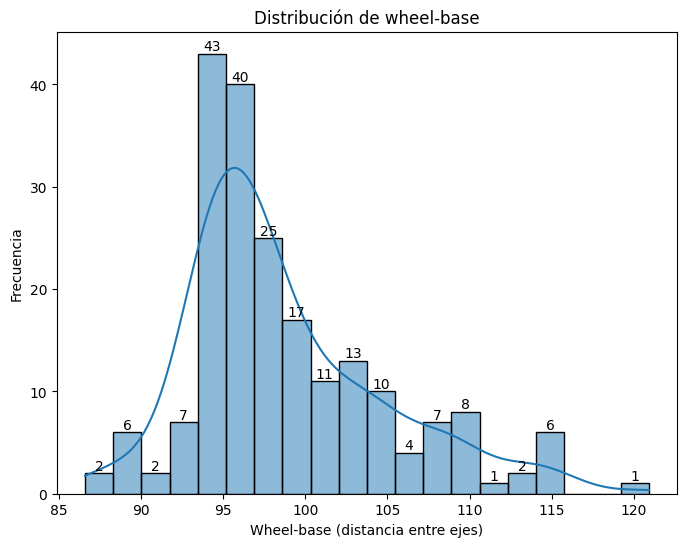

In [57]:
print("Análisis preliminar de la columna 'wheel-base'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'wheel-base': {df['wheel-base'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'wheel-base':\n")
print(df['wheel-base'].describe())

# Verificamos valores nulos
null_values_wheel_base = df['wheel-base'].isnull().sum()
print(f"\nValores nulos en 'wheel-base': {null_values_wheel_base}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['wheel-base'], bins=20, kde=True)
plt.title('Distribución de wheel-base')
plt.xlabel('Wheel-base (distancia entre ejes)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'length'

Valores únicos en 'length': [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]

Estadísticas descriptivas de la columna 'length':

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

Valores nulos en 'length': 0

Visualización:


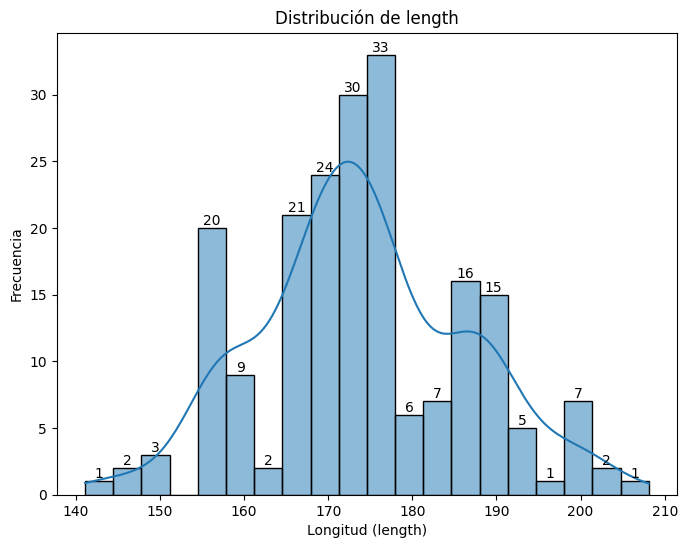

In [58]:
print("Análisis preliminar de la columna 'length'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'length': {df['length'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'length':\n")
print(df['length'].describe())

# Verificamos valores nulos
null_values_length = df['length'].isnull().sum()
print(f"\nValores nulos en 'length': {null_values_length}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['length'], bins=20, kde=True)
plt.title('Distribución de length')
plt.xlabel('Longitud (length)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'width'

Valores únicos en 'width': [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]

Estadísticas descriptivas de la columna 'width':

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

Valores nulos en 'width': 0

Visualización:


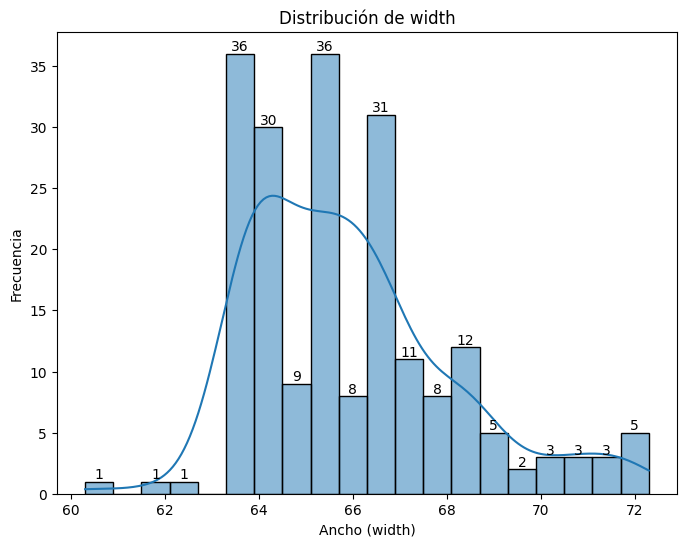

In [59]:
print("Análisis preliminar de la columna 'width'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'width': {df['width'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'width':\n")
print(df['width'].describe())

# Verificamos valores nulos
null_values_width = df['width'].isnull().sum()
print(f"\nValores nulos en 'width': {null_values_width}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['width'], bins=20, kde=True)
plt.title('Distribución de width')
plt.xlabel('Ancho (width)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'height'

Valores únicos en 'height': [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 50.2
 52.6 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5
 58.7 54.9 56.7 55.4 54.8 49.4 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5]

Estadísticas descriptivas de la columna 'height':

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

Valores nulos en 'height': 0

Visualización:


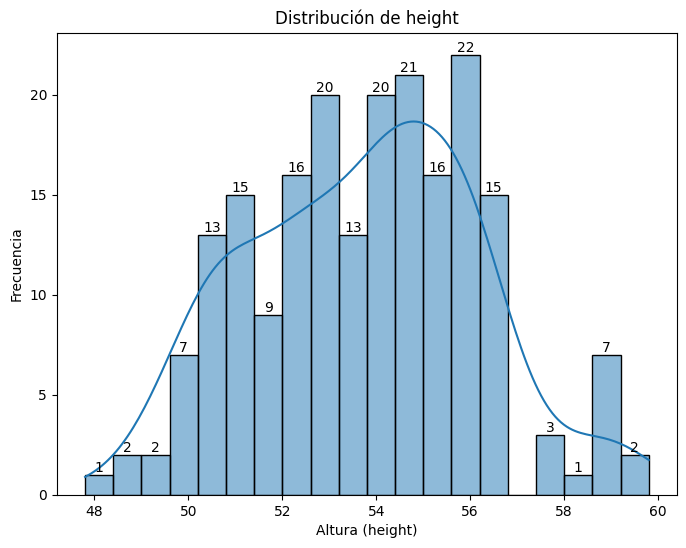

In [60]:
print("Análisis preliminar de la columna 'height'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'height': {df['height'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'height':\n")
print(df['height'].describe())

# Verificamos valores nulos
null_values_height = df['height'].isnull().sum()
print(f"\nValores nulos en 'height': {null_values_height}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['height'], bins=20, kde=True)
plt.title('Distribución de height')
plt.xlabel('Altura (height)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'curb-weight'

Valores únicos en 'curb-weight': [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975 2326 2480 2414 2458 2976 3016 3131 3151 2261 2209 2264
 2212 2319 2254 2221 2661 2563 2912 3034 2935 3042 3045 3157 2952 3049
 3012 3217 3062]

Estadísticas descriptivas de la columna 'curb-we

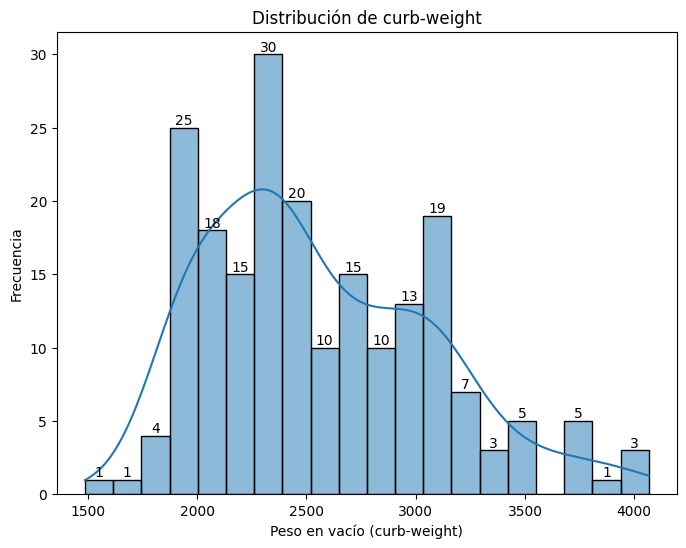

In [61]:
print("Análisis preliminar de la columna 'curb-weight'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'curb-weight': {df['curb-weight'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'curb-weight':\n")
print(df['curb-weight'].describe())

# Verificamos valores nulos
null_values_curb_weight = df['curb-weight'].isnull().sum()
print(f"\nValores nulos en 'curb-weight': {null_values_curb_weight}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['curb-weight'], bins=20, kde=True)
plt.title('Distribución de curb-weight')
plt.xlabel('Peso en vacío (curb-weight)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'engine-type'

Valores únicos en 'engine-type': ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Conteo de valores en 'engine-type':
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

Valores nulos en 'engine-type': 0

Visualización:


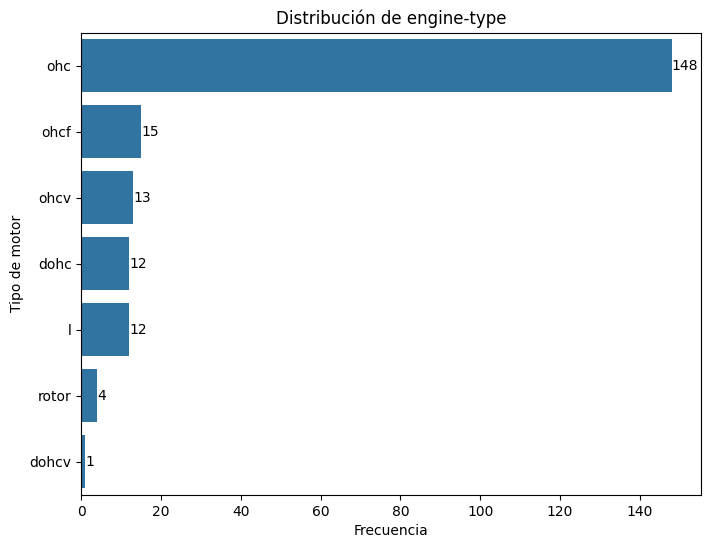

In [62]:
print("Análisis preliminar de la columna 'engine-type'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'engine-type': {df['engine-type'].unique()}\n")

# Conteo de valores
value_counts_engine_type = df['engine-type'].value_counts()
print(f"Conteo de valores en 'engine-type':")
print(value_counts_engine_type)

# Verificamos valores nulos
null_values_engine_type = df['engine-type'].isnull().sum()
print(f"\nValores nulos en 'engine-type': {null_values_engine_type}\n")

# Visualizamos la distribución con un gráfico de barras horizontal
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts_engine_type.values, y=value_counts_engine_type.index)
plt.title('Distribución de engine-type')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de motor')

for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'num-of-cylinders'

Valores únicos en 'num-of-cylinders': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Conteo de valores en 'num-of-cylinders':
num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

Valores nulos en 'num-of-cylinders': 0

Visualización:


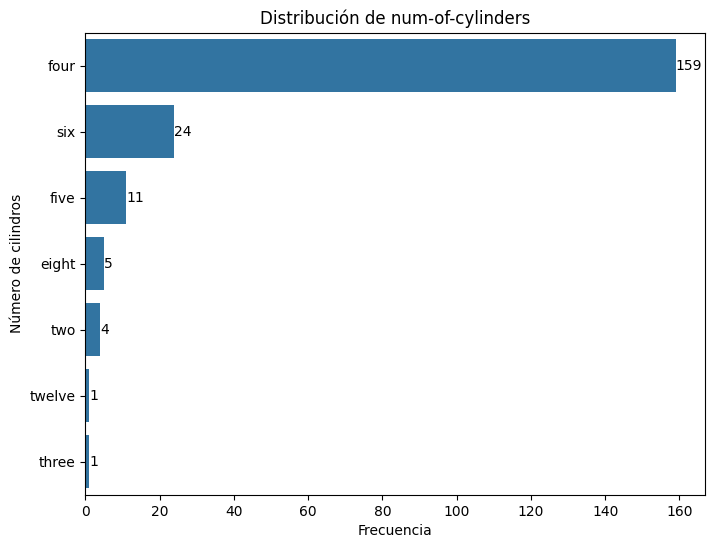

In [63]:
print("Análisis preliminar de la columna 'num-of-cylinders'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'num-of-cylinders': {df['num-of-cylinders'].unique()}\n")

# Conteo de valores
value_counts_num_cylinders = df['num-of-cylinders'].value_counts()
print(f"Conteo de valores en 'num-of-cylinders':")
print(value_counts_num_cylinders)

# Verificamos valores nulos
null_values_num_cylinders = df['num-of-cylinders'].isnull().sum()
print(f"\nValores nulos en 'num-of-cylinders': {null_values_num_cylinders}\n")

# Visualizamos la distribución con un gráfico de barras horizontal
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts_num_cylinders.values, y=value_counts_num_cylinders.index)
plt.title('Distribución de num-of-cylinders')
plt.xlabel('Frecuencia')
plt.ylabel('Número de cilindros')

for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'engine-size'

Valores únicos en 'engine-size': [130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]

Estadísticas descriptivas de la columna 'engine-size':

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

Valores nulos en 'engine-size': 0

Visualización:


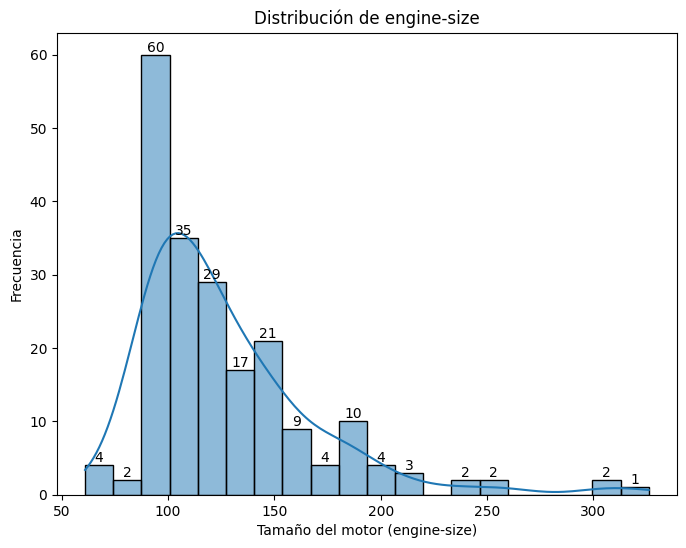

In [64]:
print("Análisis preliminar de la columna 'engine-size'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'engine-size': {df['engine-size'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'engine-size':\n")
print(df['engine-size'].describe())

# Verificamos valores nulos
null_values_engine_size = df['engine-size'].isnull().sum()
print(f"\nValores nulos en 'engine-size': {null_values_engine_size}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['engine-size'], bins=20, kde=True)
plt.title('Distribución de engine-size')
plt.xlabel('Tamaño del motor (engine-size)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'fuel-system'

Valores únicos en 'fuel-system': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']

Conteo de valores en 'fuel-system':
fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

Valores nulos en 'fuel-system': 0

Visualización:


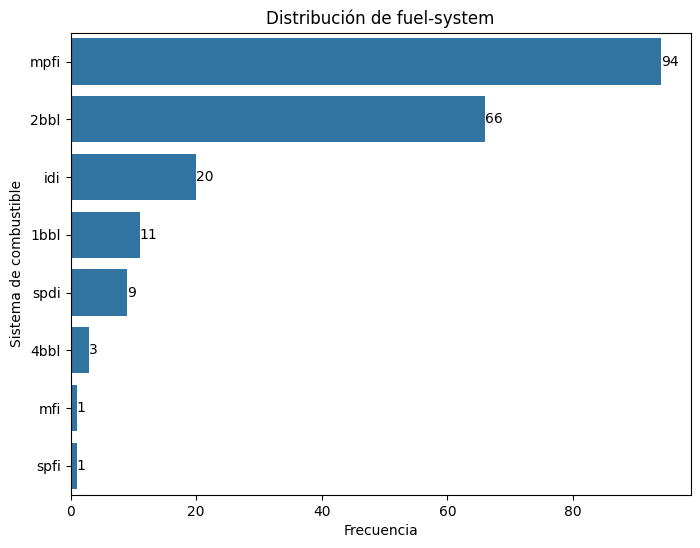

In [65]:
print("Análisis preliminar de la columna 'fuel-system'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'fuel-system': {df['fuel-system'].unique()}\n")

# Conteo de valores
value_counts_fuel_system = df['fuel-system'].value_counts()
print(f"Conteo de valores en 'fuel-system':")
print(value_counts_fuel_system)

# Verificamos valores nulos
null_values_fuel_system = df['fuel-system'].isnull().sum()
print(f"\nValores nulos en 'fuel-system': {null_values_fuel_system}\n")

# Visualizamos la distribución con un gráfico de barras horizontal
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=value_counts_fuel_system.values, y=value_counts_fuel_system.index)
plt.title('Distribución de fuel-system')
plt.xlabel('Frecuencia')
plt.ylabel('Sistema de combustible')

for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'bore'

Valores únicos en 'bore' antes de la corrección: ['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.60' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.80' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.70'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']

Valores nulos en 'bore' después del reemplazo de '?': 4

Valores nulos rellenados con la media 3.33

Valores únicos en 'bore' tras la corrección: [3.47 2.68 3.19 3.13 3.5  3.31 3.62 2.91 3.03 2.97 3.34 3.6  2.92 3.15
 3.43 3.63 3.54 3.08 3.33 3.39 3.76 3.58 3.46 3.8  3.78 3.17 3.35 3.59
 2.99 3.7  3.61 3.94 3.74 2.54 3.05 3.27 3.24 3.01]

Estadísticas descriptivas de la columna 'bore' después de la corrección:

count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: bore, dtype: float64
Visualización:


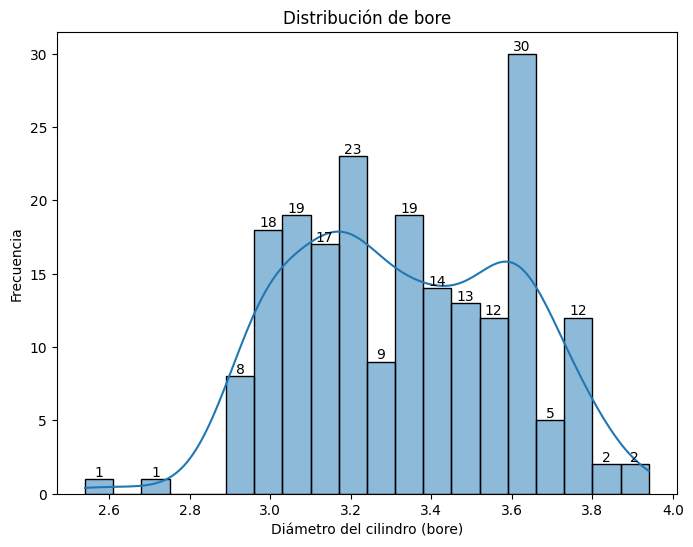

In [66]:
print("Análisis preliminar de la columna 'bore'\n")

# Verificamos valores únicos antes de la corrección
print(f"Valores únicos en 'bore' antes de la corrección: {df['bore'].unique()}\n")

# Reemplazamos valores '?' por NaN y convertimos la columna a numérico
df['bore'] = df['bore'].replace('?', pd.NA)
df['bore'] = pd.to_numeric(df['bore'])

# Verificamos valores nulos después de la corrección
null_values_bore = df['bore'].isnull().sum()
print(f"Valores nulos en 'bore' después del reemplazo de '?': {null_values_bore}\n")

# Rellenamos los valores nulos con la media de la columna
if null_values_bore > 0:
    mean_bore = round(df['bore'].mean(), 2)
    df['bore'] = df['bore'].fillna(mean_bore)
    print(f"Valores nulos rellenados con la media {mean_bore}\n")

# Verificamos valores únicos tras la corrección
print(f"Valores únicos en 'bore' tras la corrección: {df['bore'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'bore' después de la corrección:\n")
print(df['bore'].describe())

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['bore'], bins=20, kde=True)
plt.title('Distribución de bore')
plt.xlabel('Diámetro del cilindro (bore)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'stroke'

Valores únicos en 'stroke' antes de la corrección: ['2.68' '3.47' '3.40' '2.80' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46'
 '3.90' '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' '?' '3.16' '3.64' '3.10'
 '3.35' '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.90' '2.07'
 '2.36' '2.64' '3.08' '3.50' '3.54' '2.87']


Valores nulos en 'stroke' después del reemplazo de '?': 4

Valores nulos rellenados con la media 3.26

Valores únicos en 'stroke' tras la corrección: [2.68 3.47 3.4  2.8  3.19 3.39 3.03 3.11 3.23 3.46 3.9  3.41 3.07 3.58
 4.17 2.76 3.15 3.26 3.16 3.64 3.1  3.35 3.12 3.86 3.29 3.27 3.52 2.19
 3.21 2.9  2.07 2.36 2.64 3.08 3.5  3.54 2.87]

Estadísticas descriptivas de la columna 'stroke' después de la corrección:

count    205.000000
mean       3.255512
std        0.313598
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64
Visualización:


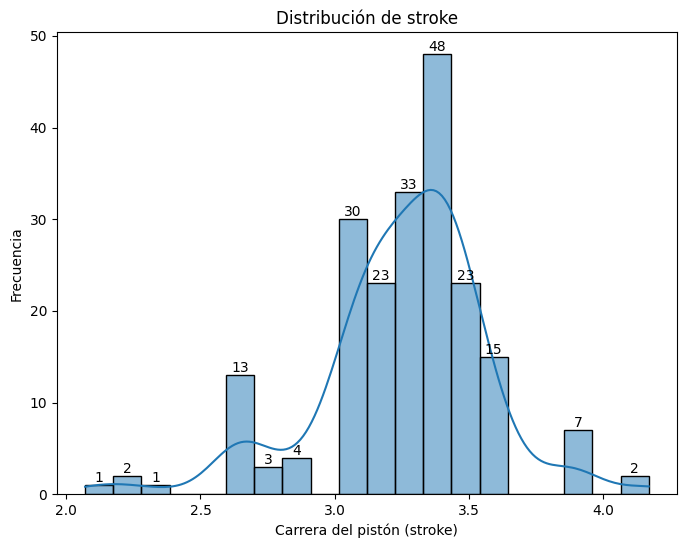

In [67]:
print("Análisis preliminar de la columna 'stroke'\n")

# Verificamos valores únicos antes de la corrección
print(f"Valores únicos en 'stroke' antes de la corrección: {df['stroke'].unique()}\n")

# Reemplazamos valores '?' por NaN y convertimos la columna a numérico
df['stroke'] = df['stroke'].replace('?', pd.NA)
df['stroke'] = pd.to_numeric(df['stroke'])

# Verificamos valores nulos después de la corrección
null_values_stroke = df['stroke'].isnull().sum()
print(f"\nValores nulos en 'stroke' después del reemplazo de '?': {null_values_stroke}\n")

# Rellenamos los valores nulos con la media de la columna
if null_values_stroke > 0:
    mean_stroke = round(df['stroke'].mean(), 2)
    df['stroke'] = df['stroke'].fillna(mean_stroke)
    print(f"Valores nulos rellenados con la media {mean_stroke:.2f}\n")

# Verificamos valores únicos tras la corrección
print(f"Valores únicos en 'stroke' tras la corrección: {df['stroke'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'stroke' después de la corrección:\n")
print(df['stroke'].describe())

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['stroke'], bins=20, kde=True)
plt.title('Distribución de stroke')
plt.xlabel('Carrera del pistón (stroke)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'compression-ratio'

Valores únicos en 'compression-ratio': [ 9.   10.    8.    8.5   8.3   7.    8.8   9.5   9.6   9.41  9.4   7.6
  9.2  10.1   9.1   8.1  11.5   8.6  22.7  22.   21.5   7.5  21.9   7.8
  8.4  21.    8.7   9.31  9.3   7.7  22.5  23.  ]

Estadísticas descriptivas de la columna 'compression-ratio':

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression-ratio, dtype: float64

Valores nulos en 'compression-ratio': 0

Visualización:


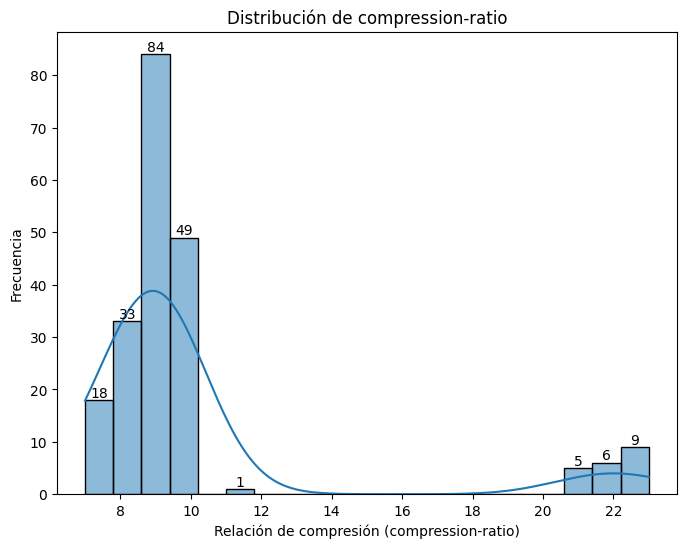

In [68]:
print("Análisis preliminar de la columna 'compression-ratio'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'compression-ratio': {df['compression-ratio'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'compression-ratio':\n")
print(df['compression-ratio'].describe())

# Verificamos valores nulos
null_values_compression_ratio = df['compression-ratio'].isnull().sum()
print(f"\nValores nulos en 'compression-ratio': {null_values_compression_ratio}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['compression-ratio'], bins=20, kde=True)
plt.title('Distribución de compression-ratio')
plt.xlabel('Relación de compresión (compression-ratio)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'horsepower'

Valores únicos en 'horsepower' antes de la corrección: ['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' '?' '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']


Valores nulos en 'horsepower' después del reemplazo de '?': 2

Valores nulos rellenados con la media 104.26

Estadísticas descriptivas de la columna 'horsepower' después de la corrección:

count    205.000000
mean     104.256195
std       39.519211
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64
Visualización:


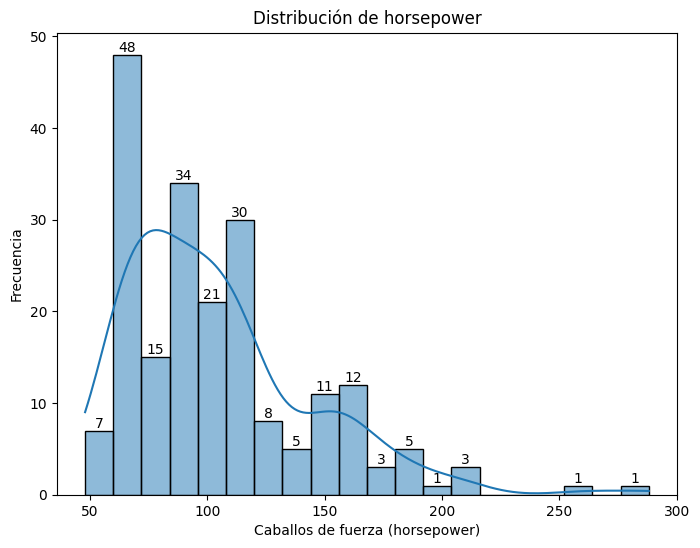

In [69]:
print("Análisis preliminar de la columna 'horsepower'\n")

# Verificamos valores únicos antes de la corrección
print(f"Valores únicos en 'horsepower' antes de la corrección: {df['horsepower'].unique()}\n")

# Reemplazamos valores '?' por NaN y convertimos la columna a numérico
df['horsepower'] = df['horsepower'].replace('?', pd.NA)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Verificamos valores nulos después de la corrección
null_values_horsepower = df['horsepower'].isnull().sum()
print(f"\nValores nulos en 'horsepower' después del reemplazo de '?': {null_values_horsepower}\n")

# Rellenamos los valores nulos con la media de la columna
if null_values_horsepower > 0:
    mean_horsepower = round(df['horsepower'].mean(), 2)
    df['horsepower'] = df['horsepower'].fillna(mean_horsepower)
    print(f"Valores nulos rellenados con la media {mean_horsepower:.2f}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'horsepower' después de la corrección:\n")
print(df['horsepower'].describe())

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['horsepower'], bins=20, kde=True)
plt.title('Distribución de horsepower')
plt.xlabel('Caballos de fuerza (horsepower)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'peak-rpm'

Valores únicos en 'peak-rpm' antes de la corrección: ['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4650'
 '4200' '4350' '4500' '5200' '4150' '5600' '5900' '5750' '?' '5250' '4900'
 '4400' '6600' '5300']


Valores nulos en 'peak-rpm' después del reemplazo de '?': 2

Valores nulos rellenados con la media 5125.37

Estadísticas descriptivas de la columna 'peak-rpm' después de la corrección:

count     205.000000
mean     5125.369463
std       476.979093
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64
Visualización:


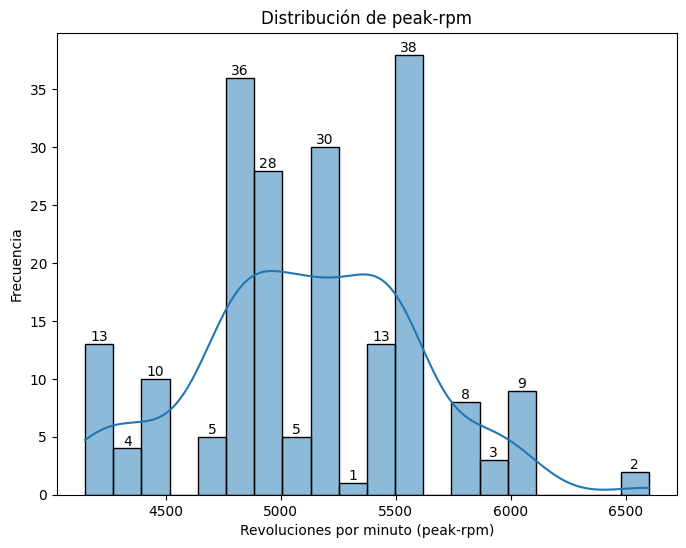

In [70]:
print("Análisis preliminar de la columna 'peak-rpm'\n")

# Verificamos valores únicos antes de la corrección
print(f"Valores únicos en 'peak-rpm' antes de la corrección: {df['peak-rpm'].unique()}\n")

# Reemplazamos valores '?' por NaN y convertimos la columna a numérico
df['peak-rpm'] = df['peak-rpm'].replace('?', pd.NA)
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])

# Verificamos valores nulos después de la corrección
null_values_peak_rpm = df['peak-rpm'].isnull().sum()
print(f"\nValores nulos en 'peak-rpm' después del reemplazo de '?': {null_values_peak_rpm}\n")

# Rellenamos los valores nulos con la media de la columna
if null_values_peak_rpm > 0:
    mean_peak_rpm = round(df['peak-rpm'].mean(), 2)
    df['peak-rpm'] = df['peak-rpm'].fillna(mean_peak_rpm)
    print(f"Valores nulos rellenados con la media {mean_peak_rpm:.2f}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'peak-rpm' después de la corrección:\n")
print(df['peak-rpm'].describe())

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['peak-rpm'], bins=20, kde=True)
plt.title('Distribución de peak-rpm')
plt.xlabel('Revoluciones por minuto (peak-rpm)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'city-mpg'

Valores únicos en 'city-mpg': [21 19 24 18 17 16 23 20 15 47 38 37 31 49 30 27 25 13 26 36 22 14 45 28
 32 35 34 29 33]

Estadísticas descriptivas de la columna 'city-mpg':

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

Valores nulos en 'city-mpg': 0

Visualización:


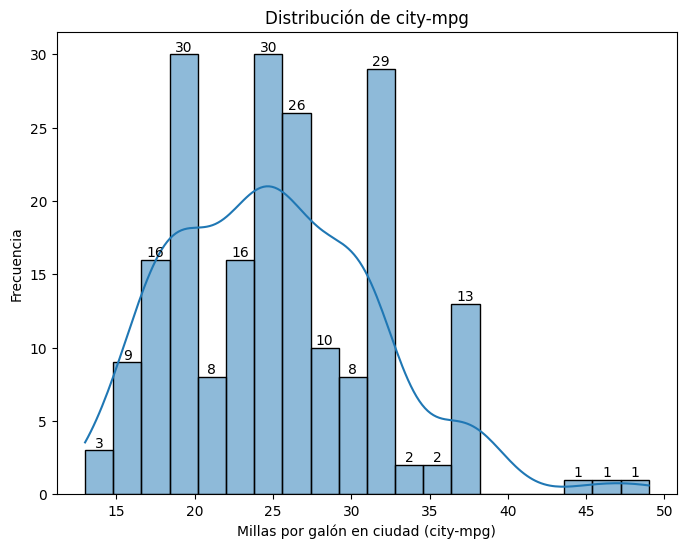

In [71]:
print("Análisis preliminar de la columna 'city-mpg'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'city-mpg': {df['city-mpg'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'city-mpg':\n")
print(df['city-mpg'].describe())

# Verificamos valores nulos
null_values_city_mpg = df['city-mpg'].isnull().sum()
print(f"\nValores nulos en 'city-mpg': {null_values_city_mpg}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['city-mpg'], bins=20, kde=True)
plt.title('Distribución de city-mpg')
plt.xlabel('Millas por galón en ciudad (city-mpg)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'highway-mpg'

Valores únicos en 'highway-mpg': [27 26 30 22 25 20 29 28 53 43 41 38 24 54 42 34 33 31 19 17 23 32 39 18
 16 37 50 36 47 46]

Estadísticas descriptivas de la columna 'highway-mpg':

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

Valores nulos en 'highway-mpg': 0

Visualización:


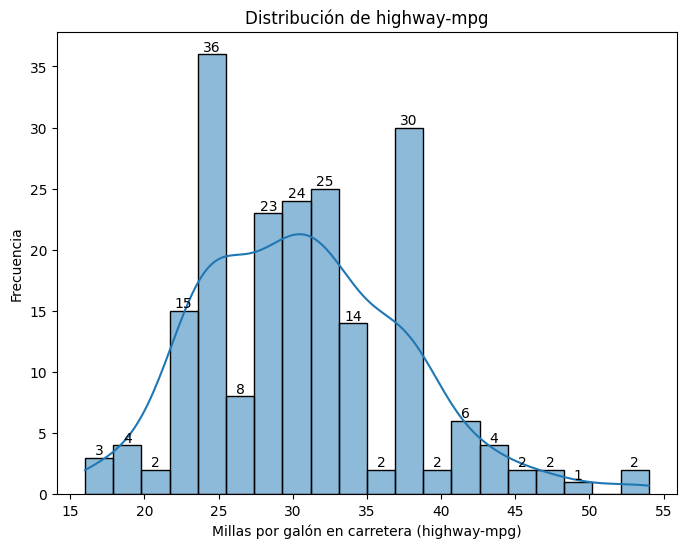

In [72]:
print("Análisis preliminar de la columna 'highway-mpg'\n")

# Verificamos valores únicos
print(f"Valores únicos en 'highway-mpg': {df['highway-mpg'].unique()}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'highway-mpg':\n")
print(df['highway-mpg'].describe())

# Verificamos valores nulos
null_values_highway_mpg = df['highway-mpg'].isnull().sum()
print(f"\nValores nulos en 'highway-mpg': {null_values_highway_mpg}\n")

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['highway-mpg'], bins=20, kde=True)
plt.title('Distribución de highway-mpg')
plt.xlabel('Millas por galón en carretera (highway-mpg)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Análisis preliminar de la columna 'price'

Valores únicos en 'price' antes de la corrección: ['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575' '5572' '6377' '7957' '6229' '6692' '7609' '8558' '8921'
 '12964' '6479' '6855' '5399' '6529' '7129' '7295' '7895' '9095' '8845'
 '10295' '12945' '10345' '6785' '11048' '32250' '35550' '36000' '5195'
 '6095' '6795' '6695' '7395' '10945' '11845' '13645' '15645' '8495'
 '10595' '10245' '10795' '11245' '18280' '18344' '25552' '28248' '28176'
 '31600' '34184' '35056' '40960' '45400' '16503' '5389' '6189' '6669'
 '7689' '9959' '8499' '12629' '14869' '14489' '6989' '8189' '9279' '5499'
 '7099' '6649' '6849' '7349' '7299' '7799' '7499' '7999' '8249' '8949'
 '9549' '13499' '14399' '17199' '19699' '18399' '11900' '13200' '12440'
 '13860' '15580' '16900' '16695' '17075' '16630' '17950' '18150' '12764'
 '22018' '32528' '34028' '37028' '9295' '9895' '118

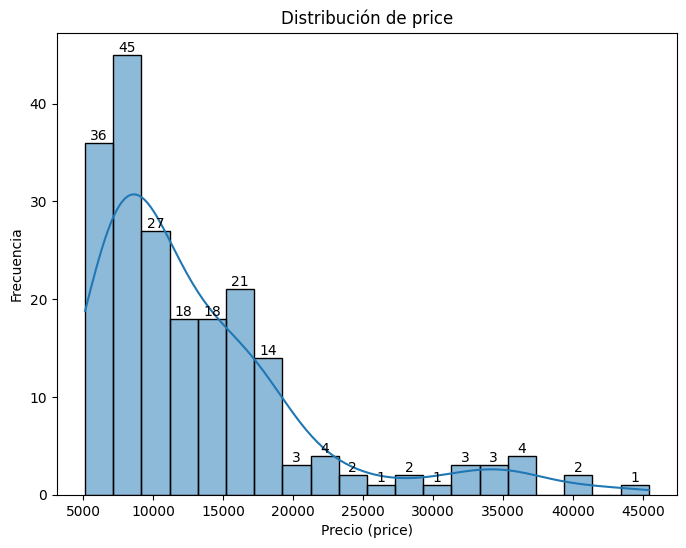

In [73]:
print("Análisis preliminar de la columna 'price'\n")

# Verificamos valores únicos antes de la corrección
print(f"Valores únicos en 'price' antes de la corrección: {df['price'].unique()}\n")

# Reemplazamos valores '?' por NaN y convertimos la columna a numérico
df['price'] = df['price'].replace('?', pd.NA)
df['price'] = pd.to_numeric(df['price'])

# Verificamos valores nulos después de la corrección
null_values_price = df['price'].isnull().sum()
print(f"\nValores nulos en 'price' después del reemplazo de '?': {null_values_price}\n")

# Rellenamos los valores nulos con la media de la columna
if null_values_price > 0:
    mean_price = round(df['price'].mean(), 2)
    df['price'] = df['price'].fillna(mean_price)
    print(f"Valores nulos rellenados con la media {mean_price:.2f}\n")

# Estadísticas descriptivas
print("Estadísticas descriptivas de la columna 'price' después de la corrección:\n")
print(df['price'].describe())

# Visualizamos la distribución con un histograma
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribución de price')
plt.xlabel('Precio (price)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

print(f"Visualización:")
plt.show()

Comprobamos si existe algún registro duplicado en el Dataframe obtenido:

In [74]:
df[df.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


Obtenemos información general sobre el dataframe resultante:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Obtenemos las métricas principales del dataset resultante:

In [76]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255512,10.142537,104.256195,5125.369463,25.219512,30.751220,13207.129366
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313598,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Ingeniería de características

### Interacción de variables

Creamos dos nuevos atributos a partir de la interacción entre las variables potencia-peso y marca-precio de los coches.

· Relación potencia-peso: Para medir la eficiencia de rendimiento de un coche en función de su peso. Un coche ligero con mucha potencia tendrá un mayor ratio de potencia-peso y, por lo tanto, probablemente será más rápido o eficiente en cuanto a rendimiento. Por ejemplo, si dos coches tienen la misma potencia, pero uno es menos pesado, éste tendrá un mejor rendimiento.

· Relación marca-precio: Comparamos el precio unitario de un coche con el precio promedio de la misma marca. Un valor cercano a 1 indica que el coche tiene un precio similar al promedio de los coches de esa marca. Valores menores a 1 indican que el coche es más barato que el promedio de su marca y valores mayores a 1 indican que el precio es superior al promedio de la marca.

In [78]:
# Creamos la columna power-to-weight ratio (relación potencia-peso)
df['power_to_weight'] = df['horsepower'] / df['curb-weight']
print("Nueva columna 'power_to_weight' creada.\n")

# Creamos la columna make-price ratio (relación marca-precio)
# Para ello, primero calculamos el precio promedio por marca y lo unimos con el DataFrame original.
price_x_make = df.groupby('make')['price'].transform('mean')
df['make_price_ratio'] = df['price'] / price_x_make
print("Nueva columna 'make_price_ratio' creada.\n")

Nueva columna 'power_to_weight' creada.

Nueva columna 'make_price_ratio' creada.



In [79]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power_to_weight,make_price_ratio
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.043564,0.870739
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.043564,1.064631
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.054552,1.064631
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.043646,0.811302
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.040722,1.014854


### Binning

Agrupamos los datos de los atributos de potencia y precio para categorizarlos y estudiar tendencias en diferentes rangos de valores (baja, media o alta potencia y coches de gama baja, media o alta).

In [80]:
# Binning para la columna horsepower (potencia baja, media, alta)
# Definimos los límites de los bins basados en el rango de valores
bins_hp = [df['horsepower'].min(), 90, 150, df['horsepower'].max()]
labels_hp = ['potencia baja', 'potencia media', 'potencia alta']
df['horsepower_binned'] = pd.cut(df['horsepower'], bins=bins_hp, labels=labels_hp)
print("Binning aplicado a la columna 'horsepower'.\n")

# Binning para la columna price (gama baja, media, alta)
# Definimos los límites de los bins para la columna de precios
bins_price = [df['price'].min(), 10000, 30000, df['price'].max()]
labels_price = ['gama baja', 'gama media', 'gama alta']
df['price_binned'] = pd.cut(df['price'], bins=bins_price, labels=labels_price)
print("Binning aplicado a la columna 'price'.\n")

Binning aplicado a la columna 'horsepower'.

Binning aplicado a la columna 'price'.



In [81]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power_to_weight,make_price_ratio,horsepower_binned,price_binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,0.043564,0.870739,potencia media,gama media
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,0.043564,1.064631,potencia media,gama media
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,0.054552,1.064631,potencia alta,gama media
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,0.043646,0.811302,potencia media,gama media
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,0.040722,1.014854,potencia media,gama media


Guardamos el Dataset final en formato csv:

In [88]:
df.to_csv('dataset_EDA.csv', index=False)

### Clustering de gamas de precios y potencias por marca de coche

Visualizamos mediante gráficos de dispersión la distribución de los coches en función de su potencia y de su precio para cada marca. El binning de potencias y precios anterior se utiliza para agrupar los puntos por categorías.

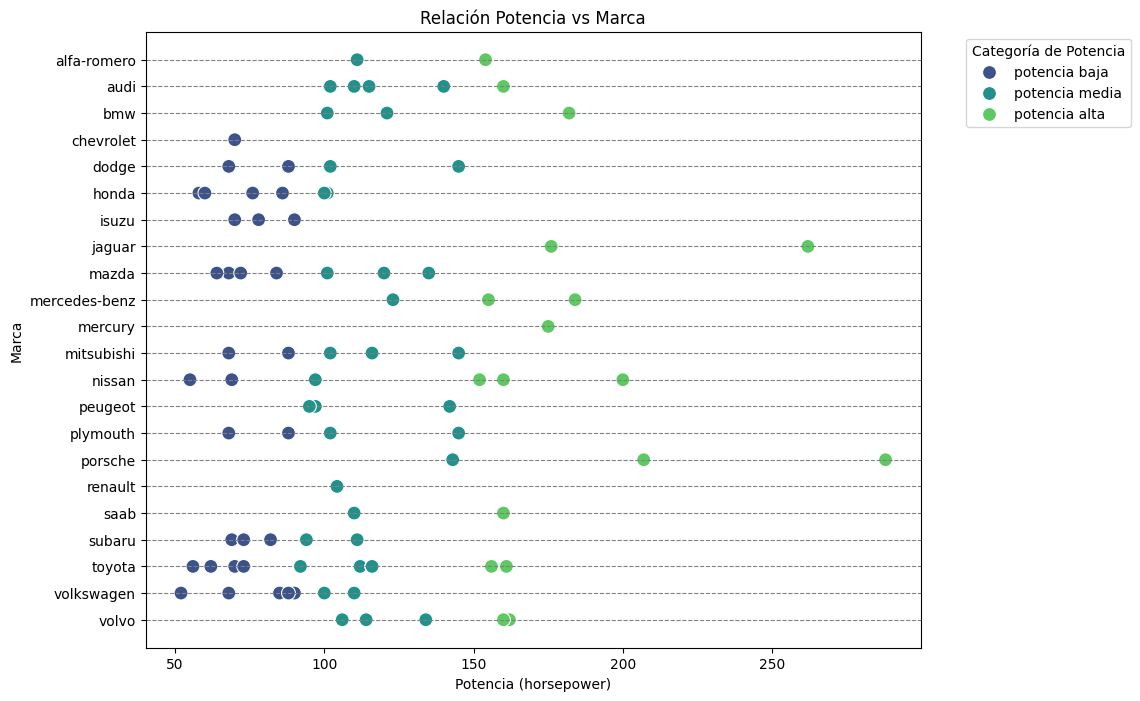

In [85]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='horsepower', y='make', hue='horsepower_binned', palette='viridis', data=df, s=100)
plt.title('Relación Potencia vs Marca')
plt.xlabel('Potencia (horsepower)')
plt.ylabel('Marca')
ax.grid(True, axis='y', linestyle='--', color='gray')
plt.legend(title='Categoría de Potencia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

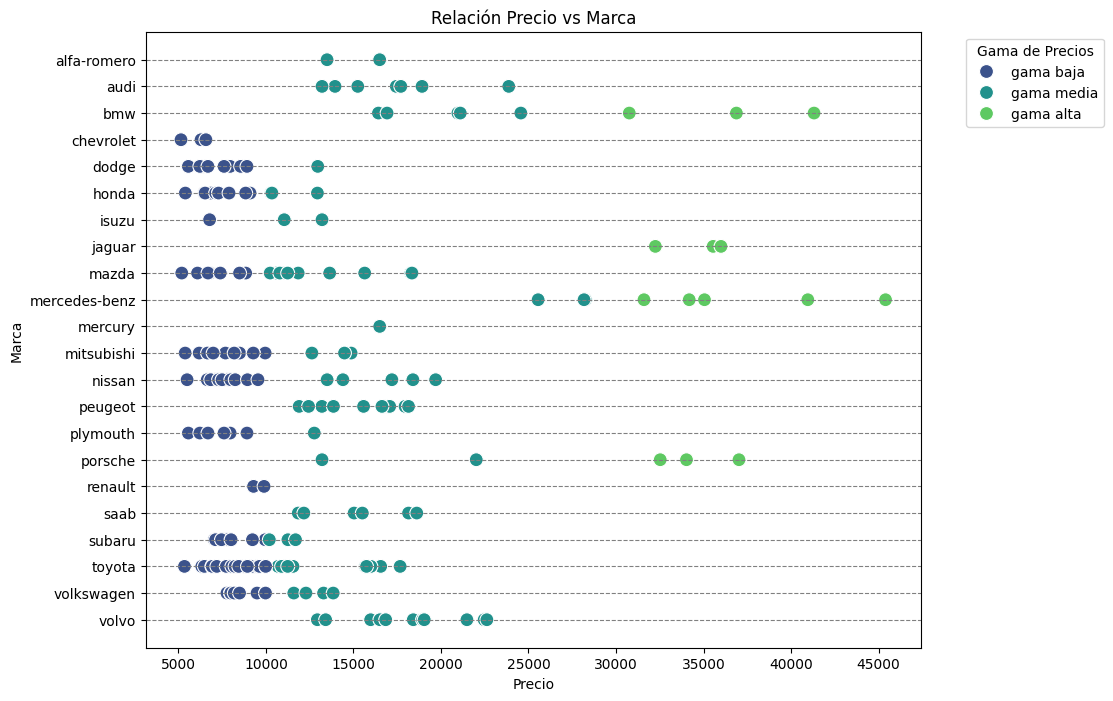

In [86]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='price', y='make', hue='price_binned', palette='viridis', data=df, s=100)
plt.title('Relación Precio vs Marca')
plt.xlabel('Precio')
plt.ylabel('Marca')
ax.grid(True, axis='y', linestyle='--', color='gray')
plt.legend(title='Gama de Precios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Matriz de correlación de variables

Generamos una matriz con algunas variables para analizar las correlaciones entre ellas.

· Cuanta más correlación positiva haya (más cercana a 1), el color será más verde.
· Cuanta menos correlación (más cercana a 0), el color será blanco.
· Y cuanta más correlación negativa haya (más cercana a -1), el color será rojo.

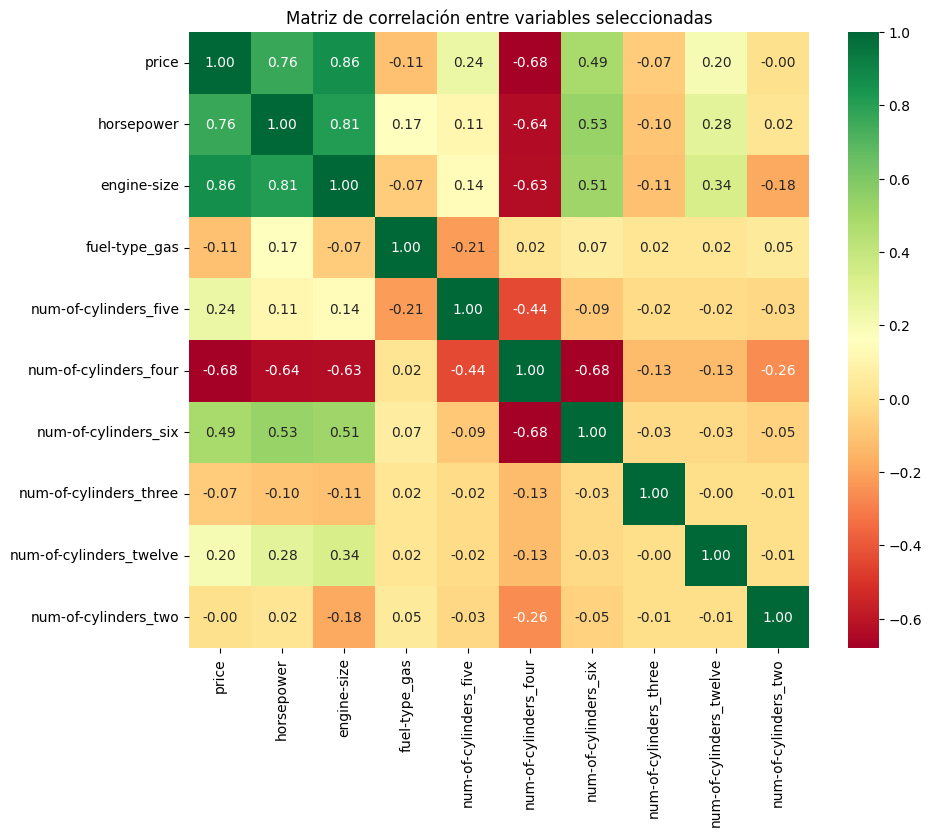

In [87]:
# Seleccionamos columnas
cols = ['price', 'horsepower', 'fuel-type', 'engine-size', 'num-of-cylinders']

# Convertimos las variables categóricas a numéricas para la matriz de correlación
df_encoded = pd.get_dummies(df[cols], drop_first=True)

# Generamos la matriz de correlación
corr_matrix = df_encoded.corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f')  # Cambiamos a verde-rojo
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()